# Storke Prediction 

Stroke is a leading cause of death and disability worldwide. Early prediction and prevention of stroke can significantly improve patient outcomes. With the advancement of technology, machine learning algorithms are being used to predict the occurrence of stroke at an early stage. This allows for timely intervention and treatment, potentially saving lives and improving the quality of life for those at risk.

## Abstract
Stroke is a major global health concern, causing death and disability for many. By predicting and preventing stroke early on, patient outcomes can be greatly improved. Machine learning algorithms are being utilized to predict the likelihood of stroke in its early stages by analyzing large data sets to identify patterns and risk factors. This enables timely intervention and prevention. This work focuses on the application of machine learning algorithms to predict the occurrence of stroke at an early stage.

## Problem statement
The lack of reliable stroke prediction datasets hinders the development of accurate machine learning models for early detection and prevention of stroke. This poses a significant challenge for healthcare professionals in identifying high-risk individuals and implementing appropriate preventive measures. A high-quality stroke prediction dataset is urgently needed to improve stroke prevention and treatment.

## Attributes 
1)id: unique identifier

2)gender: "Male", "Female" or "Other"

3)age: age of the patient

4)hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5)heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6)ever_married: "No" or "Yes"

7)work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8)Residence_type: "Rural" or "Urban"

9)avg_glucose_level: average glucose level in blood

10)bmi: body mass index

11)smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"

12)stroke: 1 if the patient had a stroke or 0 if not

## Importing Libraries 

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score
from sklearn.metrics import roc_curve, auc

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the dataset using pandas
df = pd.read_csv("healthcare-dataset-stroke-data.csv")

#first five rows of dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
#last five rows of dataset
df.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [4]:
#volume of dataset
df.shape

(5110, 12)

In [5]:
#information of dataset with its types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


## Dealing with Null values

In [7]:
df.isnull()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,False,False,False,False,False,False,False,False,False,True,False,False
5106,False,False,False,False,False,False,False,False,False,False,False,False
5107,False,False,False,False,False,False,False,False,False,False,False,False
5108,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

From data we can see that bmi had 201 null values, 
we need to remove the null values.

In [9]:
#removing the null values from dataset
df['bmi'] = df['bmi'].replace({'NAN':np.nan}).astype(float)
df["bmi"] = df["bmi"].fillna(value=df["bmi"].mean())

In [10]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

From above data we can see that there are no null values

## Exploratory Data Analysis (EDA)

In [11]:
def piedist(data, column, labels):
    """
    Plots the distribution percentage of a categorical column
    in a pie chart.
    """
    dist = data[column].value_counts()
    colors = ['#66b3ff', '#99ff99', '#ff9999', '#ffcc99', '#be99ff']
    plt.pie(x=dist, labels=labels, autopct='%1.2f%%', pctdistance=0.5, colors=colors)
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)

### Gender

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


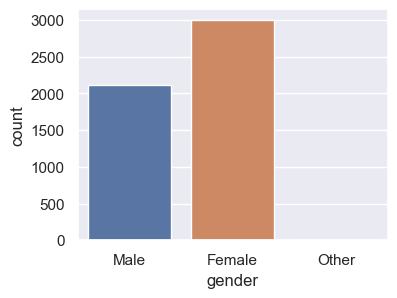

In [12]:
print(df.gender.value_counts())
plt.figure(figsize=[4,3])
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="gender")
plt.show()

 From above chart we can conclude that:
 
- There are 2115 male persons
- 2994 Female are there

### How many patients have Hypertension ?

0    4612
1     498
Name: hypertension, dtype: int64


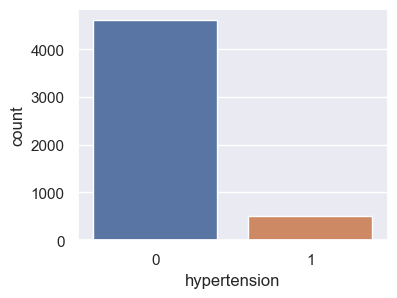

In [13]:
print(df.hypertension.value_counts())
plt.figure(figsize=[4,3])
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="hypertension")
plt.show()

From above chart we can say that:

- 4162 patients don't have Hypertension 
- 498 patients have Hypertension 

### How many patients have Heart_disease ?

0    4834
1     276
Name: heart_disease, dtype: int64


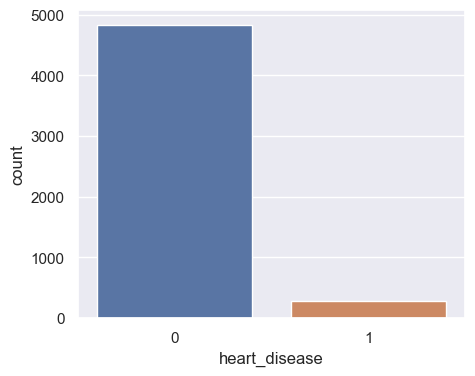

In [14]:
print(df.heart_disease.value_counts())
plt.figure(figsize=[5,4])
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df,x="heart_disease")
plt.show()

- 4834 patients don't have Heart disease
- 276 patients have Heart disease

### Martial status

Yes    3353
No     1757
Name: ever_married, dtype: int64


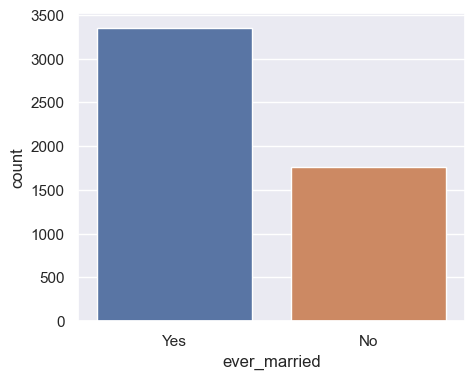

In [15]:
print(df.ever_married.value_counts())
plt.figure(figsize=[5,4])
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df,x="ever_married")
plt.show()

We can observe that:

- 3353 patients are married 
- 1757 patients didn't get married.

### How martial status related to stroke

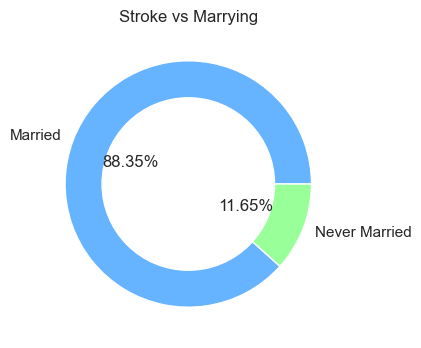

In [16]:
fig = plt.figure(figsize=(5, 4))

plt.title('Stroke vs Marrying')
piedist(data=df[df['stroke'] == 1], column='ever_married', labels=['Married', 'Never Married'])

- The majority of people (88.35%) with stroke are married.

### Work type

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


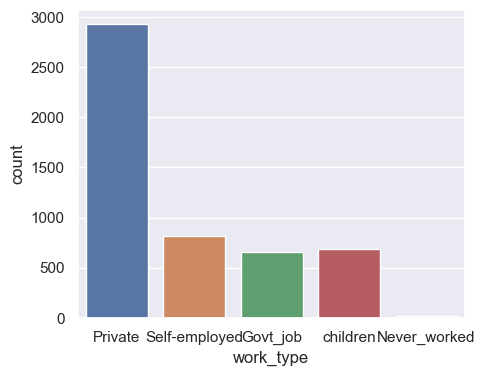

In [17]:
print(df.work_type.value_counts())
plt.figure(figsize=[5,4])
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df,x="work_type")
plt.show()

From above we can say that:
- 819 patients are self-employeed
- 657 patients are Govt_job holders
- 687 patients are children 

### How many patients have Stroke

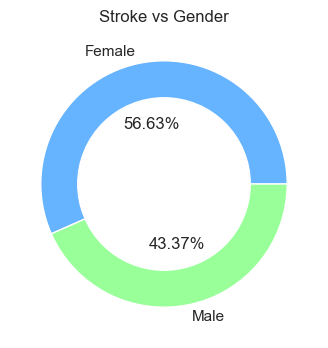

In [18]:
fig = plt.figure(figsize=(5, 4))

plt.title('Stroke vs Gender')
piedist(data=df[df['stroke'] == 1], column='gender', labels=['Female', 'Male'])

From above pie chart we can conclude that:

- 56.63% patients are facing stroke are Females
- 43.37% patients are facing stroke are Males
- Stroke doesn't seem to be biased to a specific gender.

### How dose age related to stroke

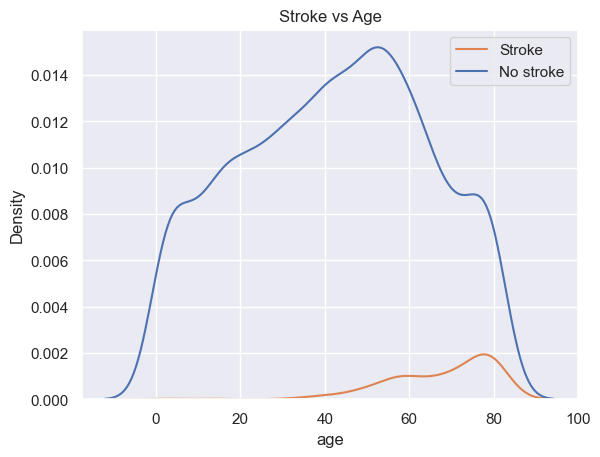

In [19]:
sns.kdeplot(data=df, x='age', hue='stroke')
plt.title('Stroke vs Age')
plt.legend(['Stroke', 'No stroke'])

- People with age > 40 tend to have stroke more than younger people.

### How dose stroke realted to hypertension 

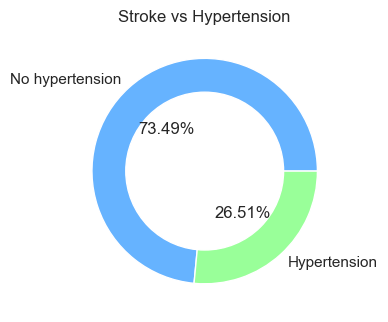

In [20]:
fig = plt.figure(figsize=(8, 5))

ax = plt.subplot2grid((1, 2), (0, 0))
plt.title('Stroke vs Hypertension')
piedist(data=df[df['stroke'] == 1], column='hypertension', labels=['No hypertension', 'Hypertension'])

- Most people don't have hypertension.
- People with hypertension tend to have stroke; 26.5% of people with stroke have hypertension.

### Smoking status

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


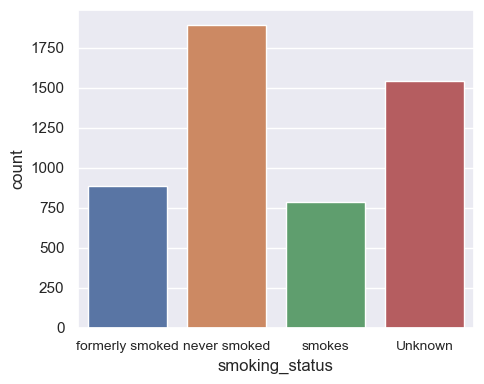

In [21]:
print(df.smoking_status.value_counts())
plt.figure(figsize=[5,4])
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df, x="smoking_status")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=10)
plt.tight_layout()
plt.show()

### How smoking status is related to stroke

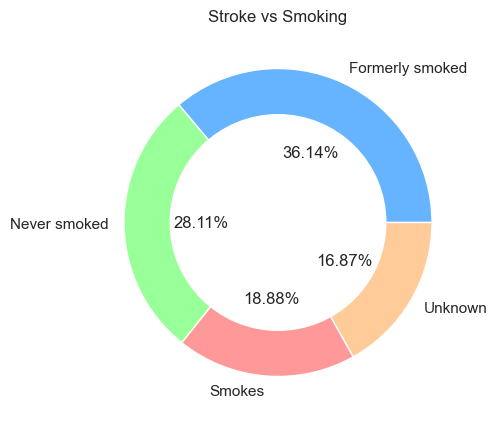

In [22]:
fig = plt.figure(figsize=(8, 5))

plt.title('Stroke vs Smoking')
piedist(data=df[df['stroke'] == 1], column='smoking_status', labels=['Formerly smoked', 'Never smoked', 'Smokes', 'Unknown'])

- People who smoke are slightly more likely to have stroke.
- Smoking doesn't seem to have a big effect on having stroke though.

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


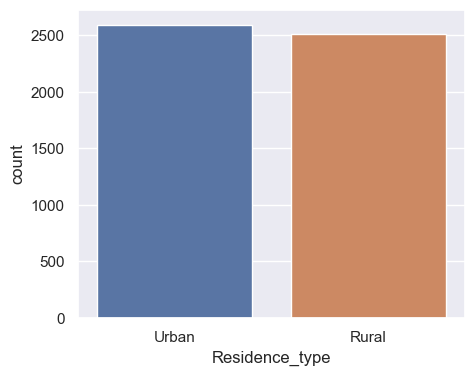

In [23]:
print(df.Residence_type.value_counts())
plt.figure(figsize=[5,4])
sns.set_theme(style="darkgrid")
ax = sns.countplot(data=df,x="Residence_type")
plt.show()

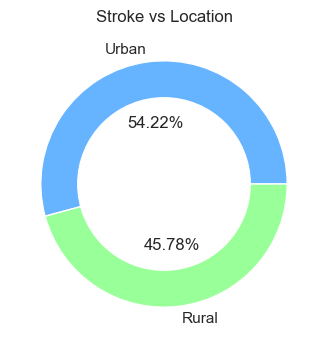

In [28]:
fig = plt.figure(figsize=(5, 4))

plt.title('Stroke vs Location')
piedist(data=df[df['stroke'] == 1], column='Residence_type', labels=['Urban', 'Rural'])

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.pairplot(df)
plt.show()

# Data Preprocessing 

In [29]:
# Convert Marrital Status, Residence and Gender into 0's and 1's
df['gender']=df['gender'].apply(lambda x : 1 if x=='Male' else 0) 
df["Residence_type"] = df["Residence_type"].apply(lambda x: 1 if x=="Urban" else 0)
df["ever_married"] = df["ever_married"].apply(lambda x: 1 if x=="Yes" else 0)

# Removing the observations that have smoking type unknown. 
df=df[df['smoking_status']!='Unknown']

# One Hot encoding smoking_status, work_type
df_dummies = df[['smoking_status','work_type']]
df_dummies=pd.get_dummies(df_dummies)
df.drop(columns=['smoking_status','work_type'],inplace=True)

df_stroke=df['stroke']
df.drop(columns=['stroke'],inplace=True)
df=df.merge(df_dummies,left_index=True, right_index=True,how='left')

In [31]:
df.head().T

,0,1,2,3,4
id,9046.00,51676.000000,31112.00,60182.00,1665.00
gender,1.00,0.000000,1.00,0.00,0.00
age,67.00,61.000000,80.00,49.00,79.00
hypertension,0.00,0.000000,0.00,0.00,1.00
heart_disease,1.00,0.000000,1.00,0.00,0.00
ever_married,1.00,1.000000,1.00,1.00,1.00
Residence_type,1.00,0.000000,0.00,1.00,0.00
avg_glucose_level,228.69,202.210000,105.92,171.23,174.12
bmi,36.60,28.893237,32.50,34.40,24.00
smoking_status_formerly smoked,1.00,0.000000,0.00,0.00,0.00


# Modeling 

### Splitting the Data

In [32]:
x_train,x_test,y_train,y_test = train_test_split(df,df_stroke,test_size=0.25,random_state=0)

In [33]:
# Keeps track of models and their scores
model_names = []
model_scores = []

In [34]:
def confusion_matrix_plot(matrix, model_name):
  """
  Plots the confusion matrix of a model as a heatmap.
  """
  _, ax = plt.subplots(figsize=(8, 5))
  plt.title(f'{model_name} Confusion Matrix')
  sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues')
  ax.set_xticklabels(['Postitive', 'Negative'])
  ax.set_yticklabels(['Postitive', 'Negative'])
  ax.set_ylabel('Predicted Values')
  ax.set_xlabel('Actual Values')
  ax.xaxis.tick_top()
  ax.xaxis.set_label_position('top')

## Navie Bayes Classifier

In [35]:
# Create and train the model
model = GaussianNB()
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.9327354260089686


In [49]:
model_names.append('Naive Bayes')
model_scores.append(roc_auc_score(y_test, rf.predict(x_test)))

## Logistic Regression 

In [36]:
lr = LogisticRegression(max_iter=1000, random_state=10)
lr.fit(x_train, y_train)

LogisticRegression(max_iter=1000, random_state=10)

In [37]:
print(classification_report(y_test, lr.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       843
           1       0.00      0.00      0.00        49

    accuracy                           0.95       892
   macro avg       0.47      0.50      0.49       892
weighted avg       0.89      0.95      0.92       892



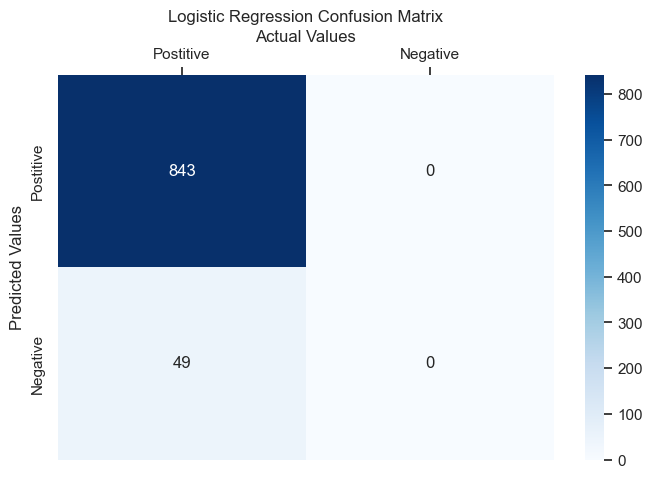

In [38]:
confusion_matrix_plot(confusion_matrix(y_test, lr.predict(x_test)), 'Logistic Regression')

In [39]:
model_names.append('Logistic Regression')
model_scores.append(roc_auc_score(y_test, lr.predict(x_test)))

## Decision Tree

In [40]:
dt = DecisionTreeClassifier(random_state=10)
dt.fit(x_train, y_train)

DecisionTreeClassifier(random_state=10)

In [41]:
print(classification_report(y_test, dt.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       843
           1       0.11      0.10      0.11        49

    accuracy                           0.91       892
   macro avg       0.53      0.53      0.53       892
weighted avg       0.90      0.91      0.90       892



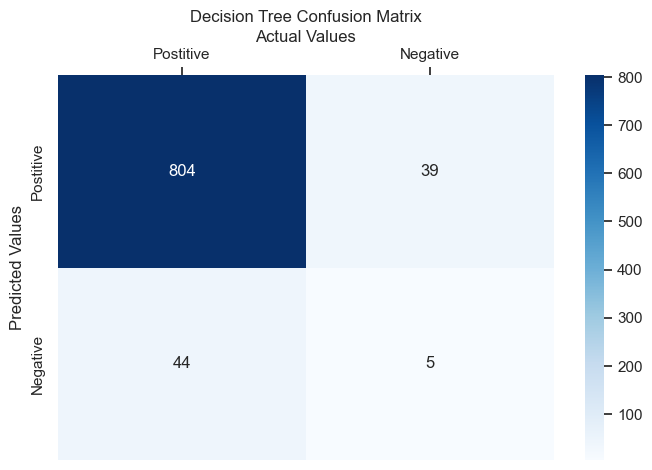

In [42]:
confusion_matrix_plot(confusion_matrix(y_test, dt.predict(x_test)), 'Decision Tree')

In [43]:
model_names.append('Decision Tree')
model_scores.append(roc_auc_score(y_test, dt.predict(x_test)))

## Random Forest

In [44]:
rf = RandomForestClassifier(random_state=10)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=10)

In [45]:
print(classification_report(y_test, rf.predict(x_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       843
           1       0.00      0.00      0.00        49

    accuracy                           0.95       892
   macro avg       0.47      0.50      0.49       892
weighted avg       0.89      0.95      0.92       892



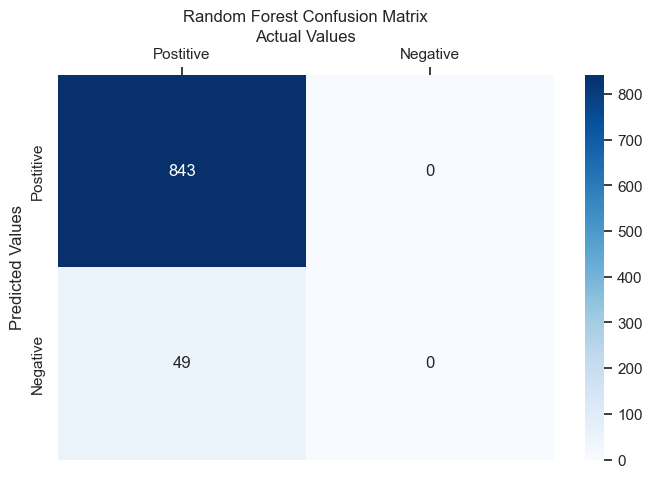

In [46]:
confusion_matrix_plot(confusion_matrix(y_test, rf.predict(x_test)), 'Random Forest')

In [47]:
model_names.append('Random Forest')
model_scores.append(roc_auc_score(y_test, rf.predict(x_test)))

In [50]:
model_and_score = pd.DataFrame()
model_and_score['name'] = model_names
model_and_score['score'] = model_scores
model_and_score.style.background_gradient(cmap=sns.light_palette('green', as_cmap=True))

,name,score
0,Logistic Regression,0.500000
1,Decision Tree,0.527889
2,Random Forest,0.500000
3,Naive Bayes,0.500000
